In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
np.random.seed(42)

# Model implementation

Implementation of a logistic regression model with using SGD an momentum

In [2]:
class Logistic_Regression_SGD_momentum():
    def __init__(self):
        self.w = np.ndarray
        self.B = np.ndarray
        self.loss = []
    
    #Sigmoid function
    def __S(self, t):
        S = 1/(1 + np.exp(-t))
        return S
    

    #Loss function
    def __loss_function(self, pred, y):
        return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
    
    #Lerning schedule
    def __learning_schedule(self,t0, t1, t):
        return t0/(t+t1)
    
    def fit(self,X: np.ndarray, y: np.ndarray, n_iter, loss_check=10, learning_schedule=(5,50), momentum_beta=0.9) -> None:
        n_features = X.shape[1]
        # Initialization of initial weights and biases are 0 
        B = 0 
        w = np.zeros(n_features)
        
        # Initialization of initial moment vectors are 0
        m_w = 0
        m_B = 0
        beta = momentum_beta
        
        #Learning schedule hyperparameters
        t0, t1 = learning_schedule
      
        for n in range(n_iter): 
            for i in range(X.shape[0]): 
                random_index = np.random.randint(X.shape[0]) 
                Xi = X[random_index:random_index+1] 
                yi = y[random_index:random_index+1]
                

                Z = np.dot(w, np.transpose(Xi)) + B
                class_pred = self.__S(Z)
                dZ = class_pred - yi

                dw = np.dot(np.transpose(Xi), dZ)
                dB = np.sum(dZ)
                
                #Learning rate with simulated annealing
                lr = self.__learning_schedule(t0, t1, n*X.shape[0]+i) 

                
                m_w = beta*m_w - lr*dw
                w += m_w
                
                m_B = beta*m_B - lr*dB
                B += m_B
                
                
                self.loss.append(self.__loss_function(class_pred, y))
                
            if n%loss_check == 0:
                print(f'Epoch: {n}, Learning_rate: {lr}, Loss : {self.__loss_function(class_pred, y)}')
        self.w = w
        self.B = B
        
        pass
    
    def loss_graph(self):
        A = np.linspace(0, len(self.loss), len(self.loss),endpoint = True)
        plt.figure(figsize=(15,5))
        plt.plot(A, self.loss, '--r')
        plt.xlabel('Iteration number')
        plt.ylabel('Loss function value')
        plt.show()

    def predict(self, X: np.ndarray, show_weights_bias = False) -> np.ndarray:
        if show_weights_bias == True:
            print('Weights: {}'.format(self.w))
            print('Bias: {}'.format(self.B))
        Z = self.w.dot(X.T) + self.B
        pred = []
        for i in range(len(self.__S(Z))):
            if self.__S(Z)[i] > 0.5:
                pred.append(1)
            else:
                pred.append(0)
        return pred

    def evaluate(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        true_true = 0

        for y_t, y_p in zip(y_true, y_pred):
            if y_t == y_p:
                true_true += 1 
        return true_true / len(y_true)

## Model validation

A simple example with using the basic Iris dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = iris.data[:,:2]
X.shape

(150, 2)

In [6]:
y = (iris.target != 0) * 1
y.shape

(150,)

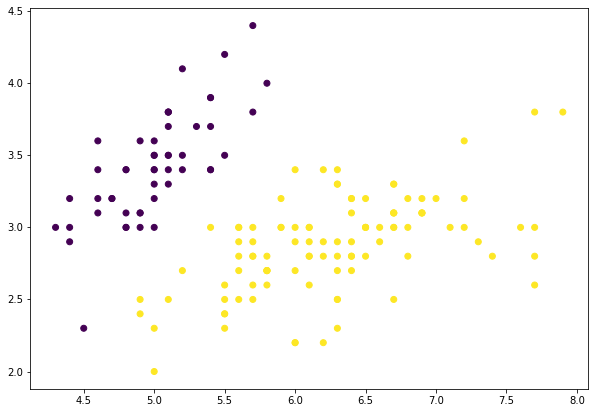

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [8]:
log_reg = Logistic_Regression_SGD_momentum()
log_reg.fit(X, y, 50,5)
y_pred_1 = log_reg.predict(X)
print(f'Accuracy: {log_reg.evaluate(y, y_pred_1)}')

Epoch: 0, Learning_rate: 0.02512562814070352, Loss : 2.377730621060124
Epoch: 5, Learning_rate: 0.005268703898840885, Loss : 3.4083052459523833
Epoch: 10, Learning_rate: 0.002942907592701589, Loss : 2.0193467568398806
Epoch: 15, Learning_rate: 0.002041649652919559, Loss : 0.7089336634904752
Epoch: 20, Learning_rate: 0.0015629884338855893, Loss : 2.1957292155021273
Epoch: 25, Learning_rate: 0.0012661433274246644, Loss : 0.9361721409303702
Epoch: 30, Learning_rate: 0.0010640561821664183, Loss : 3.5728292871902187
Epoch: 35, Learning_rate: 0.0009175995595522114, Loss : 2.3476617656467496
Epoch: 40, Learning_rate: 0.0008065817067268914, Loss : 1.759756287462736
Epoch: 45, Learning_rate: 0.000719527989638797, Loss : 2.851372122764796
Accuracy: 0.9933333333333333


The model works quite well, but high accuracy is due to the calculation of prediction based on the training set.

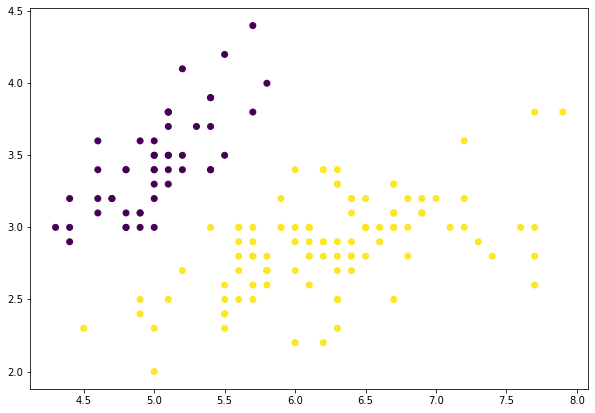

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=y_pred_1)
plt.show()

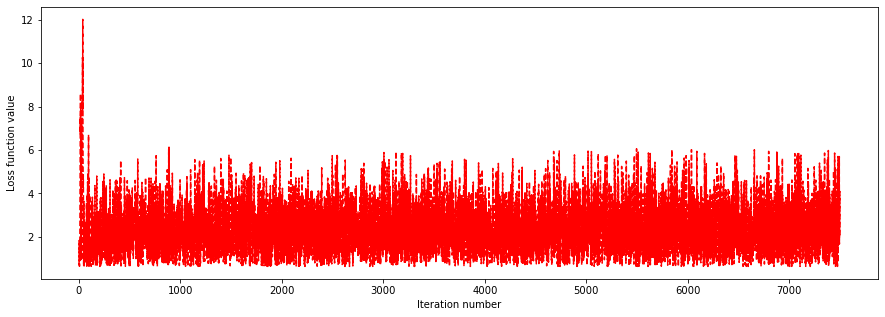

In [10]:
log_reg.loss_graph()

## Task with using MNIST dataset

The task is to train a binary classifier on a subset of the MNIST dataset, in which we distinguish classes (digits 0 and 1 are to be excluded from the dataset):

Prime numbers (2,3,5,7)

Composite numbers (4,6,8,9)

In [11]:
path = 'data/mnist'
URL='http://deeplearning.net/data/mnist/'
FILENAME = 'mnist.pkl.gz'

In [12]:
import os
import urllib
import pickle
import gzip

os.makedirs(path, exist_ok=True)

In [13]:
def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [14]:
urllib.request.urlretrieve(URL+FILENAME, path+FILENAME)
((x,y), (x_valid, y_valid), _) = load_mnist(path+FILENAME)

In [15]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [16]:
y

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

In [17]:
y_valid

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

In [18]:
def rename_numbers(a,b):
    array = np.concatenate([a,b.reshape(-1,1)], axis=1)
    array.astype('float32')
    for x in [0,1]:
        array = np.delete(array,array[:, -1] == x, axis=0)
    a_new, b_new = np.split(array, [-1], axis = 1)
    b_new = np.where(np.isin(b_new, [2,3,5,7]), 1, 0)
    return a_new, b_new


In [19]:
X, y = rename_numbers(x,y)
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
X_valid, y_valid = rename_numbers(x_valid, y_valid)
y_valid

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [21]:
X.shape

(39390, 784)

In [22]:
y.shape

(39390, 1)

In [23]:
log_reg = Logistic_Regression_SGD_momentum()
log_reg.fit(X, y.ravel(), 10,1)

<ipython-input-2-305267500e90>:15: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
<ipython-input-2-305267500e90>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()


Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 3.435174916662764
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 2.635516742816425
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 2.403715891541797
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 0.7558187640581386
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 0.732442787324001
Epoch: 5, Learning_rate: 2.1151576426991105e-05, Loss : 6.751152264570008
Epoch: 6, Learning_rate: 1.8130459534627365e-05, Loss : 0.9408420963731324
Epoch: 7, Learning_rate: 1.5864504440474793e-05, Loss : 6.278754683955907
Epoch: 8, Learning_rate: 1.4102025332878309e-05, Loss : 4.188061292489316
Epoch: 9, Learning_rate: 1.2691998202813055e-05, Loss : 2.1770459463163956


In [24]:
y_pred_2 = log_reg.predict(X_valid)

In [25]:
accuracy_before_tuning = log_reg.evaluate(y_valid, y_pred_2)
print(f'Accuracy before tuning: {accuracy_before_tuning}')

Accuracy before tuning: 0.8976714915040906


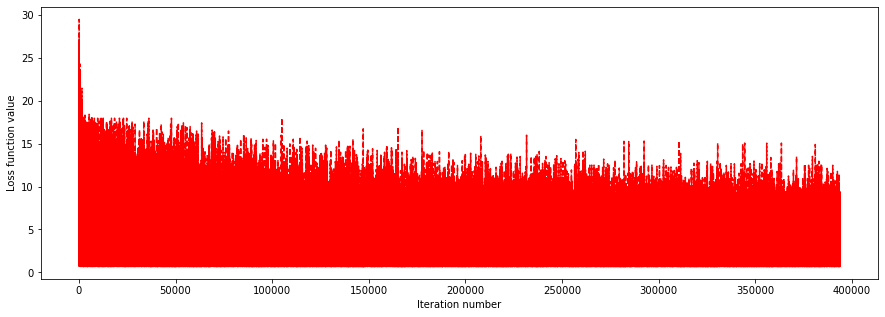

In [26]:
log_reg.loss_graph()

In [27]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_valid, y_pred_2)
conf_mx

array([[3536,  384],
       [ 429, 3596]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_valid, y_pred_2)
recall = recall_score(y_valid, y_pred_2)

print(f'Precision: {round(precision, 3)}\nRecall: {round(recall, 3)}')

Precision: 0.904
Recall: 0.893


# Model tuning

# Epoch number

In [29]:
accuracy_epoch = np.array([])
for i, epoch in enumerate([5,10,15]):
    if i == 0:
        print(f'Epoch number: {epoch}\n')
    else:
        print(f'\nEpoch number: {epoch}\n')
    log_reg = Logistic_Regression_SGD_momentum()
    log_reg.fit(X, y.ravel(), epoch,1)
    pred = log_reg.predict(X_valid)
    log_reg.evaluate(y_valid, pred)
    accuracy_epoch = np.append(accuracy_epoch, [epoch, log_reg.evaluate(y_valid, pred)])

Epoch number: 5



<ipython-input-2-305267500e90>:15: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
<ipython-input-2-305267500e90>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()


Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 7.035857094424765
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 2.941916542436507
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 0.7487985612967412
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 3.958646884020113
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 0.704699193111321

Epoch number: 10

Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 1.3488482249006555
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 9.37377312920052
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 2.5387094501704106
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 3.993820929741585
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 4.10016316009943
Epoch: 5, Learning_rate: 2.1151576426991105e-05, Loss : 3.9561388925643146
Epoch: 6, Learning_rate: 1.8130459534627365e-05, Loss : 3.8251528573782205
Epoch: 7, Learning_rate: 1.5864504440474793e-05, Loss : 4.073248308759806
Epoch: 8, Learning_rat

In [30]:
accuracy_epoch

array([ 5.        ,  0.90207678, 10.        ,  0.90220264, 15.        ,
        0.90144745])

Increasing the number of epochs has very little effect on accuracy increase. Similar values were obtained for 5 epochs, but learning takes much faster.

# Momentum beta parameter

In [31]:
accuracy_momentum_beta = np.array([])
for i, beta in enumerate([0.5, 0.75, 0.9]):
    if i == 0:
        print(f'Beta number: {beta}\n')
    else:
        print(f'\nBeta number: {beta}\n')
    log_reg = Logistic_Regression_SGD_momentum()
    log_reg.fit(X, y.ravel(), 5,1, momentum_beta=beta)
    pred_2 = log_reg.predict(X_valid)
    log_reg.evaluate(y_valid, pred_2)
    accuracy_momentum_beta = np.append(accuracy_momentum_beta, [beta, log_reg.evaluate(y_valid, pred_2)])

Beta number: 0.5

Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 1.8785103363737587
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 2.982235376961986
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 0.9886568375394714
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 2.0583855387570975
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 3.1063640118015545

Beta number: 0.75

Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 0.9794139224690865
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 2.408198889228624
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 0.8895388063161408
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 2.3173906935879596
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 1.8649607775936938

Beta number: 0.9



<ipython-input-2-305267500e90>:15: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
<ipython-input-2-305267500e90>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()


Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 2.7573775367133666
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 2.072050092911425
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 0.9976239231214126
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 1.5045077767064934
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 3.3709368079396835


In [32]:
accuracy_momentum_beta

array([0.5       , 0.90396476, 0.75      , 0.90648206, 0.9       ,
       0.90396476])

Reduction the value of momentum beta has very little effect on accuracy increase.

# Learning schedule

In [33]:
accuracy_learning_schedule = np.array([])
for i, l_h in enumerate([(1,10), (5,50), (10,100)]):
    if i == 0:
        print(f'Learning_schedule: {l_h}\n')
    else:
        print(f'\nLearning_schedule: {l_h}\n')
    log_reg = Logistic_Regression_SGD_momentum()
    log_reg.fit(X, y.ravel(), 5,1, learning_schedule = l_h)
    pred_3 = log_reg.predict(X_valid)
    log_reg.evaluate(y_valid, pred_3)
    accuracy_learning_schedule = np.append(accuracy_learning_schedule, [l_h, log_reg.evaluate(y_valid, pred_3)])

Learning_schedule: (1, 10)

Epoch: 0, Learning_rate: 2.5381354856722253e-05, Loss : 2.3084490833784757
Epoch: 1, Learning_rate: 1.269212707357626e-05, Loss : 3.885361372729287
Epoch: 2, Learning_rate: 8.461740241498067e-06, Loss : 4.0897403324196
Epoch: 3, Learning_rate: 6.34642601019236e-06, Loss : 3.4261274062290834
Epoch: 4, Learning_rate: 5.07719880787372e-06, Loss : 1.2532578930482186


c:\users\pmich\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
<ipython-input-2-305267500e90>:15: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
<ipython-input-2-305267500e90>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()



Learning_schedule: (5, 50)

Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 0.9405869038227676
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 0.7425853377323229
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 5.800504589183889
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 1.569123440571123
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 1.3206142454356409

Learning_schedule: (10, 100)

Epoch: 0, Learning_rate: 0.0002532350781230216, Loss : 2.089172297157491
Epoch: 1, Learning_rate: 0.00012677645507676313, Loss : 2.5951283276487986
Epoch: 2, Learning_rate: 8.455301050993921e-05, Loss : 4.061177589835647
Epoch: 3, Learning_rate: 6.342803138418993e-05, Loss : 0.7519154415769065
Epoch: 4, Learning_rate: 5.0748798522194984e-05, Loss : 2.938533036370322


In [34]:
accuracy_learning_schedule

array([(1, 10), 0.8932662051604783, (5, 50), 0.9029578351164255,
       (10, 100), 0.9073631214600377], dtype=object)

# Check the tuned model

Epochs Number: 5, Momentum beta value: 0.9, Learning schedule: 5,50

Advantage: faster model learning with almost identical accuracy.

In [35]:
log_reg = Logistic_Regression_SGD_momentum()
log_reg.fit(X, y.ravel(), 5,1, learning_schedule = (5, 50), momentum_beta = 0.9)
y_pred_3 = log_reg.predict(X_valid)
accuracy_after_tuning = log_reg.evaluate(y_valid, y_pred_3)
print(f'Accuracy after tuning: {accuracy_after_tuning}\nAccuracy before tuning:{accuracy_before_tuning}')

<ipython-input-2-305267500e90>:15: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()
<ipython-input-2-305267500e90>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(pred)-(1-y)*np.log(1-pred)).mean()


Epoch: 0, Learning_rate: 0.00012677806232409543, Loss : 3.6299369750051476
Epoch: 1, Learning_rate: 6.342843369825826e-05, Loss : 1.1647269462996606
Epoch: 2, Learning_rate: 4.229438584322317e-05, Loss : 5.466408460833713
Epoch: 3, Learning_rate: 3.1724076670748495e-05, Loss : 3.9492718763470007
Epoch: 4, Learning_rate: 2.538083949664719e-05, Loss : 1.1380658713358878
Accuracy after tuning: 0.9009439899307741
Accuracy before tuning:0.8976714915040906


The increase in accuracy is random due to the new learning of the model. The model was learned faster.

Another way to increase accuracy is to scale the features.

In [36]:
conf_mx = confusion_matrix(y_valid, y_pred_3)
conf_mx

array([[3570,  350],
       [ 437, 3588]], dtype=int64)

In [37]:
precision = precision_score(y_valid, y_pred_3)
recall = recall_score(y_valid, y_pred_3)

print(f'Precision: {round(precision, 3)}\nRecall: {round(recall, 3)}')

Precision: 0.911
Recall: 0.891


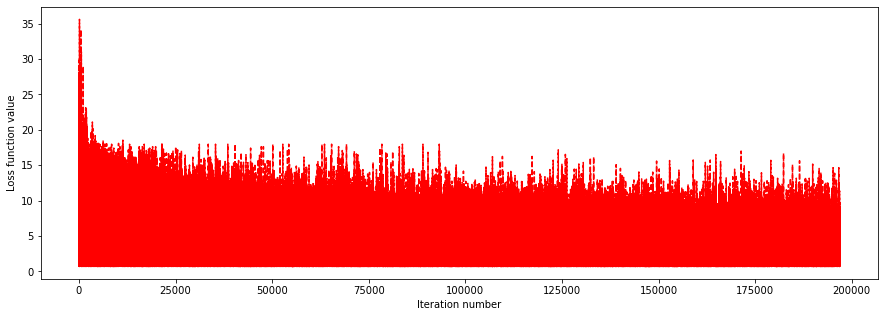

In [38]:
log_reg.loss_graph()

In [39]:
def fast_digit_check():
    number = random.randint(0, len(X_valid))
    some_digit = X_valid[number]
    some_digit_image = some_digit.reshape(28,28)
    plt.figure(figsize=(5,5))
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
    if y_valid[number] == 1:
        graph_title = 'Prediction: Prime number'
    else:
        graph_title = 'Prediction: Composite number'
    plt.title(graph_title)
    plt.axis('off')
    plt.show()

# A few examples of how the model works

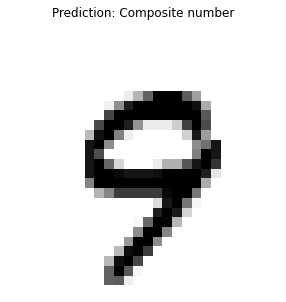

In [40]:
fast_digit_check()

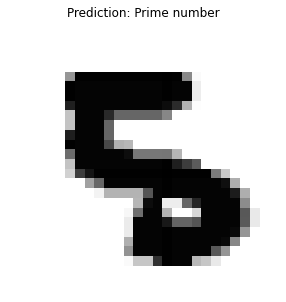

In [41]:
fast_digit_check()

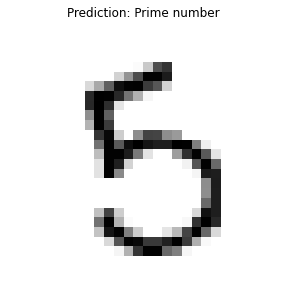

In [42]:
fast_digit_check()

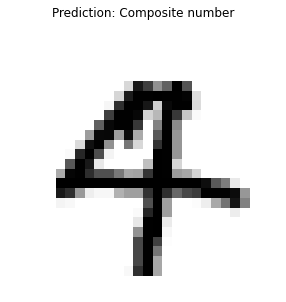

In [43]:
fast_digit_check()

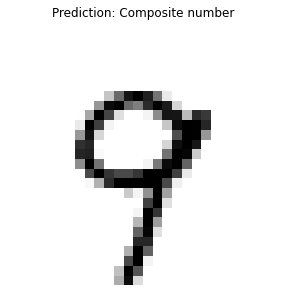

In [44]:
fast_digit_check()

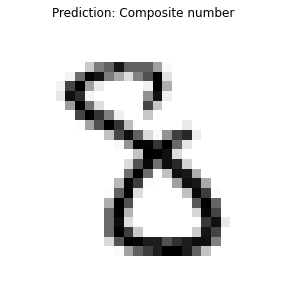

In [45]:
fast_digit_check()